## Importing libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6",
						"grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time


### Dataset

In [38]:

df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\gold_price_data.csv", parse_dates=["Date"])

In [39]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

### Data Cleaning

In [41]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [42]:
duplicates = df.duplicated().sum()

In [43]:
df.sort_values(by='Date', inplace=True)

In [44]:
 duplicates, df.head()

(np.int64(0),
         Date          SPX        GLD        USO     SLV   EUR/USD
 0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
 1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
 2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
 3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
 4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099)

#####  detect outliers from numerical columns

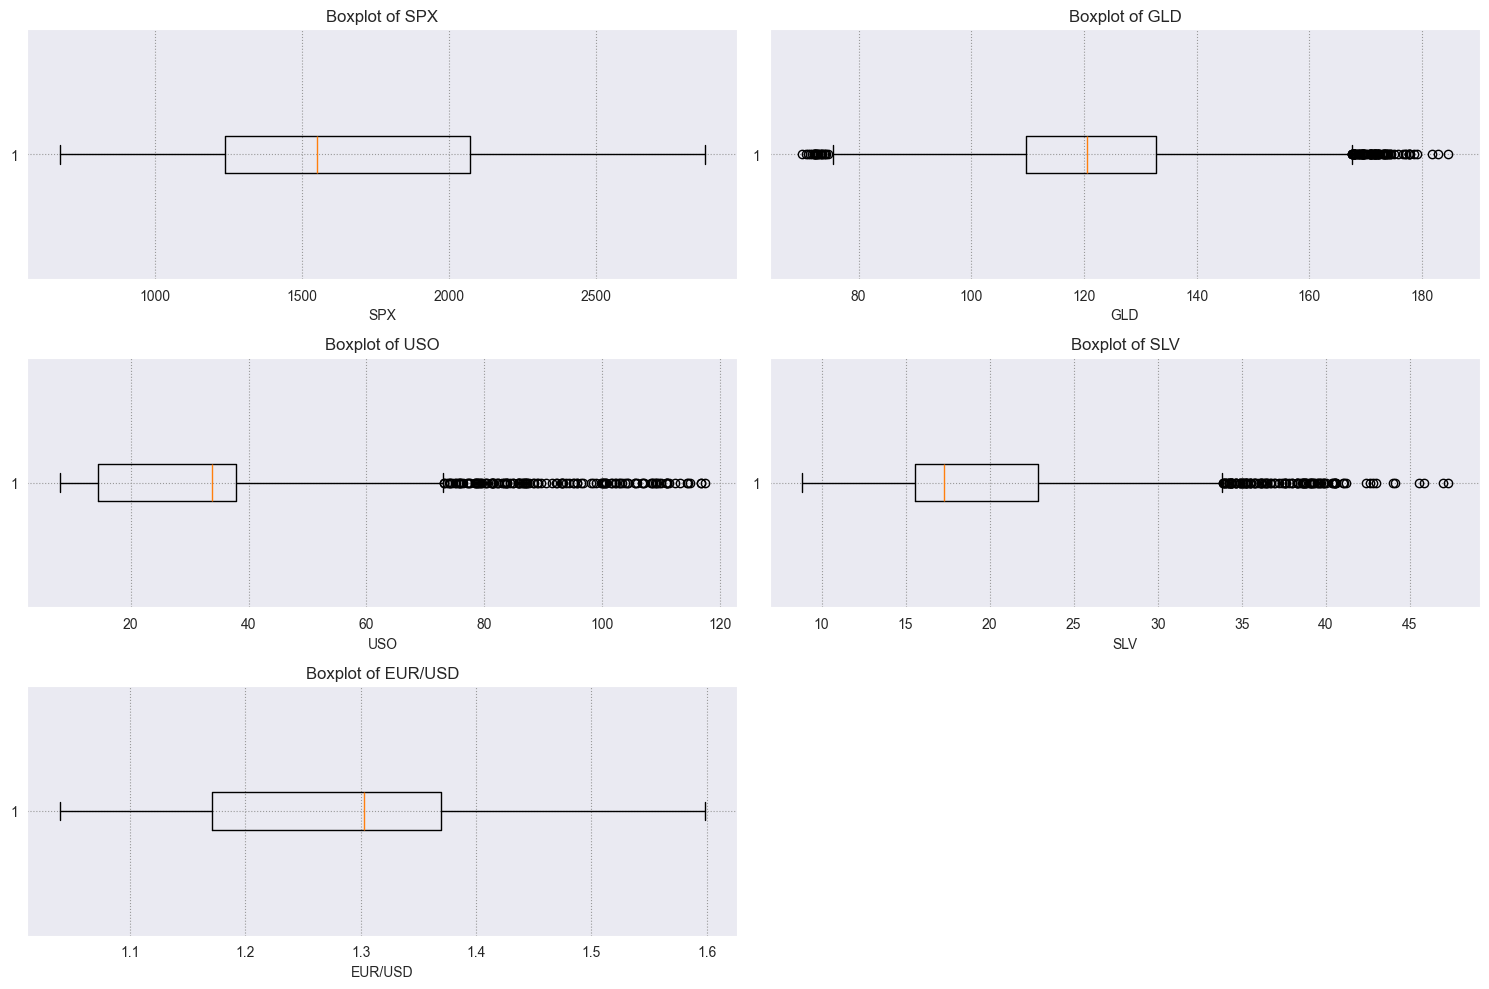

In [45]:
numerical_columns = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


###### Observations:
The boxplots of the numerical columns (SPX, GLD, USO, SLV, EUR/USD) show the presence of outliers and varying ranges, with some columns exhibiting significant variability and skewness. The position of the median line in the boxplots highlights differences in data distribution across features, which could impact analysis.

###### Conclusion:
Outliers should be addressed using capping or transformation, and feature scaling is necessary to standardize the varying ranges. Skewed features may benefit from transformations like logarithmic scaling. Correlation analysis with the target variable (GLD) is recommended to identify the most relevant predictors for modeling.

#### Correlation Matrix Heatmap

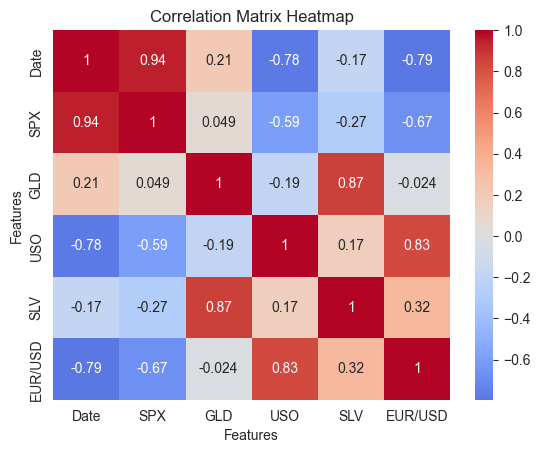

In [46]:
# Calculate correlation matrix
correlation = df.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
			center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

###### Observations:
The heatmap clearly shows the correlation between numerical features, with positive correlations in red and negative ones in blue, where intensity indicates the strength. Strong correlations, like those between GLD and SPX or GLD and SLV, suggest potential predictive relationships, while weak or negligible correlations may contribute less to the target variable.

###### Conclusion:
Strong correlations offer valuable insights into data relationships and potential predictors. Redundant features with high inter-correlation may benefit from dimensionality reduction techniques like PCA, while features with weak or no correlation to the target should be excluded to reduce noise and simplify the model.

#### "Displaying and Resetting DataFrame Index and Columns"

In [47]:

print(df.index)


df = df.reset_index()


print(df.columns)


RangeIndex(start=0, stop=2290, step=1)
Index(['index', 'Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


#### "Visualization of Gold Price Trend Over Time"

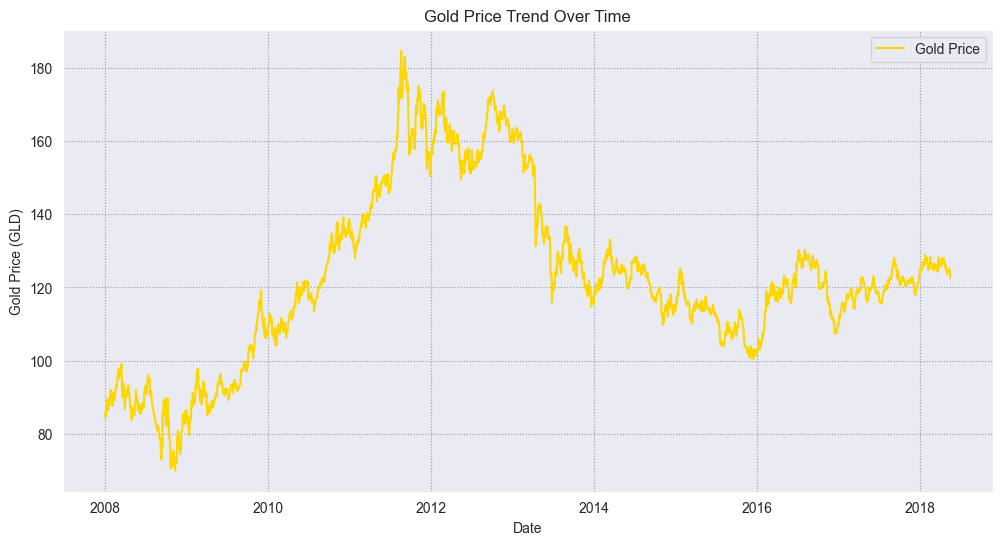

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GLD'], label='Gold Price', color='gold')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price Trend Over Time')
plt.legend()
plt.show()


###### Observation:
The plot shows the trend of gold prices (GLD) over time, with the x-axis representing the dates and the y-axis representing the gold price. The gold color of the line emphasizes the price movement, making it easy to identify the fluctuations. The trend provides a visual representation of how gold prices have changed across the dataset's time range.

###### Conclusion:
The graph offers valuable insights into the historical price fluctuations of gold, allowing for the identification of patterns, trends, or volatility. This visual analysis can be used to assess potential predictions or investments based on gold price movements over time.

#### Distribution of Gold Prices (GLD)

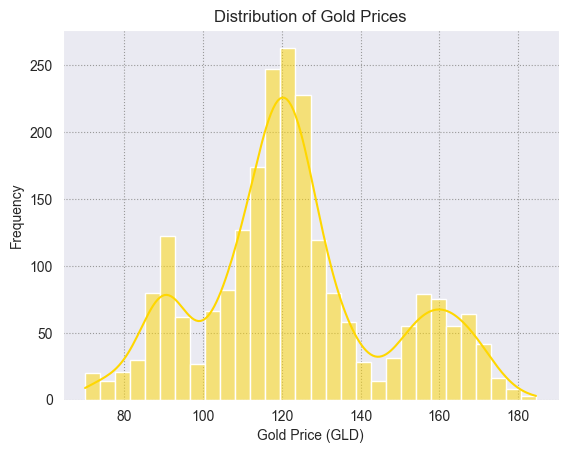

In [49]:
sns.histplot(df['GLD'], kde=True, color='gold', bins=30)
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price (GLD)')
plt.ylabel('Frequency')
plt.show()


###### Observation:
The histogram with a Kernel Density Estimate (KDE) curve illustrates the distribution of gold prices (GLD). The x-axis represents the gold prices, while the y-axis shows the frequency of occurrence. The KDE curve smooths the histogram, giving a clearer view of the price distribution, indicating the concentration and spread of gold prices across the dataset.

###### Conclusion:
This visualization provides insights into the overall distribution of gold prices, revealing whether the prices are skewed, normally distributed, or have any distinct clusters or outliers. Understanding the distribution helps in assessing the variability and central tendencies of gold prices, which is useful for further analysis or forecasting.

#### Gold Price with 30-Day Rolling Average

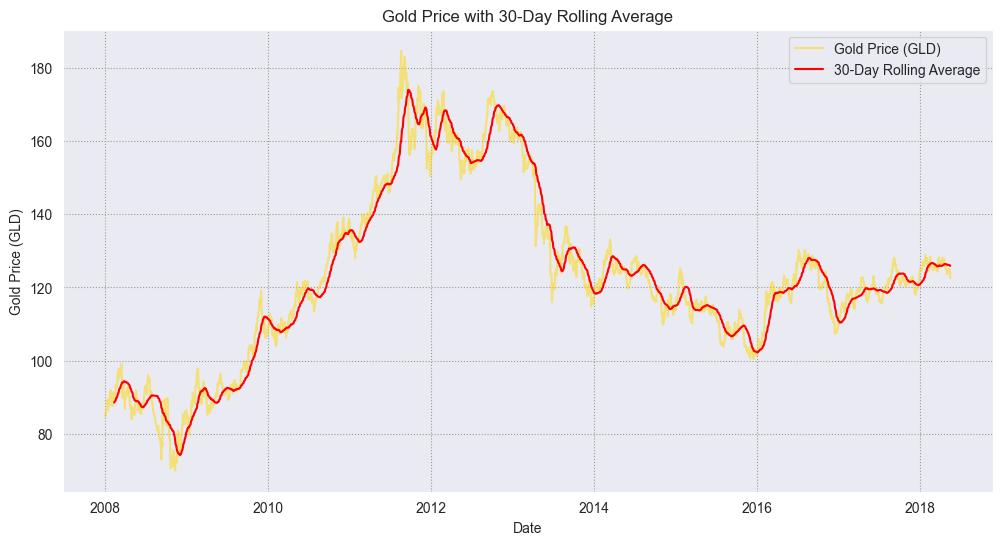

In [50]:
df['GLD_Rolling'] = df['GLD'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GLD'], label='Gold Price (GLD)', color='gold', alpha=0.5)
plt.plot(df['Date'], df['GLD_Rolling'], label='30-Day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price (GLD)')
plt.title('Gold Price with 30-Day Rolling Average')
plt.legend()
plt.show()


###### Observation:
The plot shows the gold prices (GLD) over time along with a 30-day rolling average. The gold line represents the daily gold prices, while the red line represents the 30-day rolling average, providing a smoothed view of the price trend. The rolling average helps to minimize short-term fluctuations and highlight longer-term trends in the data.

###### Conclusion:
The 30-day rolling average smooths out the volatility in gold prices, making it easier to observe the overall trend. By comparing the raw data with the rolling average, it is easier to identify periods of significant change, trends, and any potential shifts in the direction of gold prices. This visualization is useful for identifying long-term movements while filtering out daily price noise.

#### Interactive Gold Price Trend

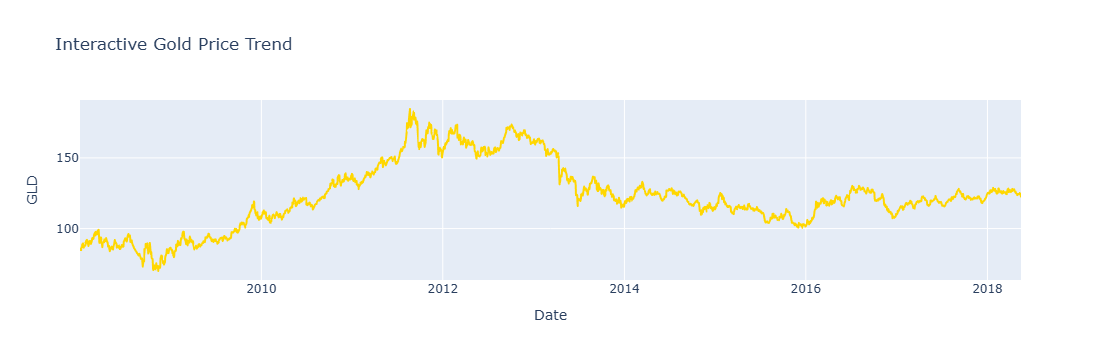

In [51]:
import plotly.express as px

fig = px.line(df, x='Date', y='GLD', title='Interactive Gold Price Trend')
fig.update_traces(line_color='gold')
fig.show()


###### Observation:
This interactive line plot displays the gold prices (GLD) over time, with the x-axis representing the dates and the y-axis representing the gold prices. The line is colored in gold to match the theme. The plot is created using Plotly, allowing for zooming, panning, and tooltips for enhanced interactivity and exploration of the data.

###### Conclusion:
The interactive plot provides a more dynamic way to explore the gold price trend, allowing users to zoom in on specific time periods and examine the fluctuations more closely. This interactive approach is particularly useful for detailed data analysis and can facilitate deeper insights into the behavior of gold prices over time.

#### "Change in Price of Gold Over Time (EUR/USD)"

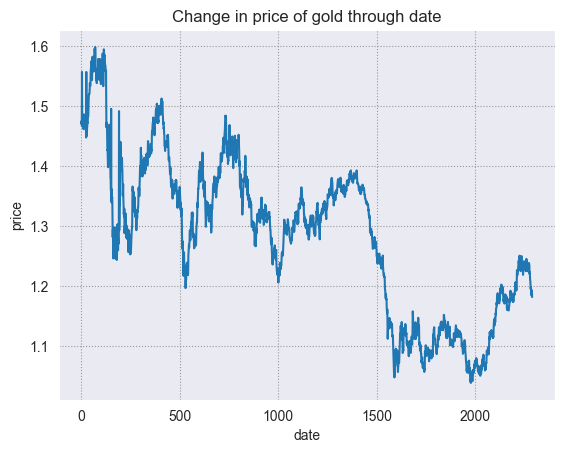

In [52]:
# plot price of gold for each increasing day
df["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

###### Observation:
This plot displays the change in the price of gold over time, with the x-axis representing the dates and the y-axis representing the price (specifically for the EUR/USD exchange rate). The graph visualizes how the gold price fluctuates over the dataset's time range, indicating periods of increase or decrease in the value of gold.

###### Conclusion:
The plot highlights the dynamic changes in the price of gold, showing fluctuations and trends over time. This visualization can be useful for identifying patterns or significant movements in gold prices, which might correlate with external factors like currency exchange rates or market conditions.

#### Splitting Data into Features and Target Variable"

In [53]:
X = df.drop(columns=['Date', 'GLD'])
y = df['GLD']



#### "Splitting Data into Training and Testing Sets"

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### "Training and Evaluating Decision Tree Regressor Model"

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dt_model = DecisionTreeRegressor(random_state=42)

In [109]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [110]:
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time
# Evaluate the model and measure prediction time
start_time = time.time()
test_score = dt_model.score(X_test, y_test)
prediction_time = time.time() - start_time


In [111]:
print("Training Score:", train_score)
print("Testing Score:", test_score)
print("Training Time (seconds):", training_time)
print("Prediction Time (seconds):", prediction_time)

Training Score: 0.9999997271336749
Testing Score: 0.9956286485908312
Training Time (seconds): 0.037552833557128906
Prediction Time (seconds): 0.003004312515258789


###### Observation:
The Decision Tree Regressor is trained on the data, and its performance is evaluated using the training and testing scores. The training and prediction times are measured to assess computational efficiency.

###### Conclusion:
The model's training and testing scores indicate its fit and generalization ability. The measured times provide insights into the computational efficiency, helping gauge performance on larger datasets.

#### "Evaluating Decision Tree Regressor Model Performance"

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
predictions = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 2.3268839413038274
Mean Absolute Error (MAE): 1.0419134344978165
R^2 Score: 0.9956286485908312


###### Observation:
The model's performance is evaluated using three metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score. These metrics provide insights into the accuracy and fit of the model on the test data. MSE measures the average squared difference between actual and predicted values, MAE calculates the average absolute difference, and R² indicates how well the model explains the variance in the target variable.

###### Conclusion:
The evaluation metrics help assess the model's prediction accuracy. Lower MSE and MAE values indicate better performance, while a higher R² score suggests that the model explains more of the variance in the target variable. These metrics are essential for understanding the quality of the model's predictions.

#### "Training and Evaluating Random Forest Regressor Model"

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
clf = RandomForestRegressor(random_state=23)
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [115]:
y_pred = clf.predict(X_test)

In [116]:
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time
# Evaluate the model and measure prediction time
start_time = time.time()
test_score = clf.score(X_test, y_test)
prediction_time = time.time() - start_time

In [117]:
print("Training Score:", train_score)
print("Testing Score:", test_score)
print("Training Time (seconds):", training_time)
print("Prediction Time (seconds):", prediction_time)

Training Score: 0.9999997271336749
Testing Score: 0.9975815059176905
Training Time (seconds): 2.8812713623046875
Prediction Time (seconds): 0.03323936462402344


###### Observation:
The Random Forest Regressor model is trained on the data, and its performance is evaluated using the training and testing scores. The training time is measured to assess the efficiency of fitting the model, while the prediction time evaluates the time taken to make predictions on the test data.

###### Conclusion:
The training and testing scores indicate how well the model fits the training data and generalizes to unseen data. The training time reflects the model's computational efficiency, and the prediction time provides insight into the model's speed in making predictions. These metrics help assess the overall performance and scalability of the model.

#### "Interactive Feature vs Gold Price Correlation Plot"

In [138]:
import ipywidgets as widgets
from ipywidgets import interact

# Interactive feature correlation plot
@interact(feature=df.columns[:-1])
def plot_feature_relationship(feature):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='GLD', color='green')
    plt.title(f'Relationship Between {feature} and GLD')
    plt.xlabel(feature)
    plt.ylabel('Gold Price (GLD)')
    plt.show()


interactive(children=(Dropdown(description='feature', options=('index', 'Date', 'SPX', 'GLD', 'USO', 'SLV', 'E…

###### Observation:
This interactive plot allows you to explore the relationship between various features and gold prices (GLD). By selecting different features from the dataset, the scatter plot dynamically updates to show how each feature correlates with the gold price. This helps identify potential relationships and patterns between features and the target variable.

###### Conclusion:
The interactive plot provides an intuitive way to explore the correlation between different features and gold prices, allowing for better understanding of key predictors. It can help identify strong relationships that could be valuable for model building or further analysis.

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'y_test' and 'y_pred' are the actual and predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Regression Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Regression Model Performance Metrics:
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.29
Root Mean Squared Error (RMSE): 1.13
R-squared (R²): 1.00
